# Necessary Libraries

In [221]:
import numpy as np
import pandas as pd
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from collections import Counter
import xgboost as xgb

sns.set(style ='whitegrid')
pd.set_option('display.max_columns', None)

# Loading the csv File and Basic Info

In [222]:
df = pd.read_csv('movie.csv')

In [223]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [225]:
df['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [226]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<AxesSubplot:xlabel='label', ylabel='count'>

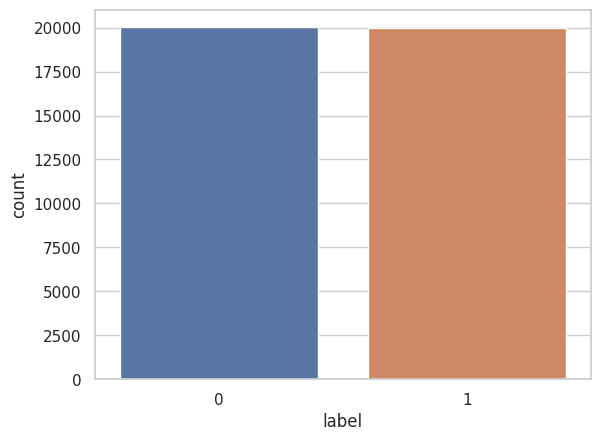

In [227]:
sns.countplot(x=df['label'])

In [228]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [229]:
df.drop_duplicates(inplace=True)

# Preprocessing

In [230]:
import nltk
nltk.download('punkt')
import re
import string
from nltk.stem import SnowballStemmer


# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    words = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stem words
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]

    # Join words back into a string
    text = ' '.join(words)

    return text

# Apply preprocessing function to 'text' column
df['text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /home/trippy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [231]:
df.head()

,text,label
0,grew b watch love thunderbird mate school watc...,0
1,put movi dvd player sat coke chip expect hope ...,0
2,peopl know particular time past like feel need...,0
3,even though great interest biblic movi bore de...,0
4,im die hard dad armi fan noth ever chang got t...,1


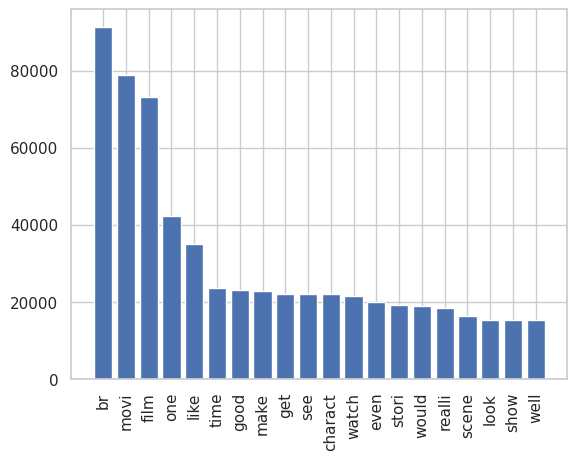

In [232]:
# Convert text data to list of words
words = df['text'].str.split().tolist()
words = [word for sublist in words for word in sublist]

# Count word frequencies
word_counts = Counter(words)

# Create bar chart of word frequencies
top_words = word_counts.most_common(20)  # Select top 20 most common words
labels, values = zip(*top_words)
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.show()

# Wordcloud

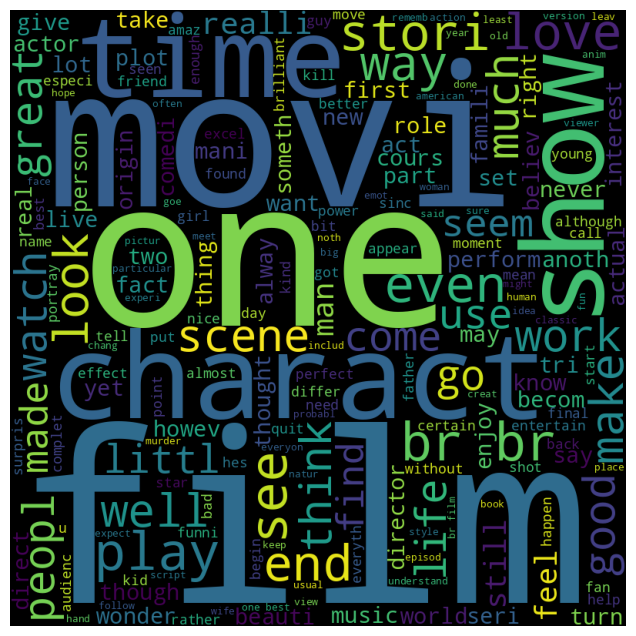

In [233]:
df_positive = df[df['label'] == 1]
text = ' '.join(df_positive['text'].tolist())

wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


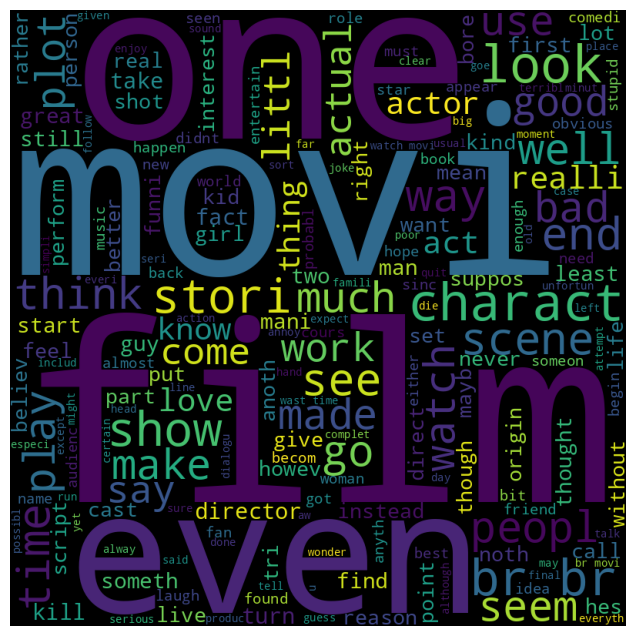

In [234]:
df_negative = df[df['label'] == 0]
text = ' '.join(df_negative['text'].tolist())

wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Splitting the data

In [235]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit vectorizer on training data and transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Models

## 1. Logistic Regression

In [237]:
# Fit logistic regression model to training data
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Predict labels on testing data
y_pred = clf.predict(X_test_tfidf)

# Predict labels on testing data
y_pred = clf.predict(X_test_tfidf)

# # Calculate false positive rate and true positive rate
# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

# Print evaluation metrics
print('Logistic Regression:')
print('Accuracy:', accuracy_lr)
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1 Score:', f1_lr)

# # Plot ROC curve
# plt.plot(fpr, tpr)
# plt.title('ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()



Logistic Regression:
Accuracy: 0.8811831340465701
Precision: 0.8716049382716049
Recall: 0.892766818411735
F1 Score: 0.8820589705147426


## 2. RandomForestClassifier Model

In [238]:
# Create Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train_tfidf, y_train)

# Predict the labels of the testing data
y_pred = clf.predict(X_test_tfidf)

accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_score_rf = f1_score(y_test, y_pred)

# # Calculate false positive rate and true positive rate
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# # Calculate AUC score
# auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print('Random Forest Classifier:')
print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_score_rf)
print('AUC Score:', auc)

# # Plot the ROC curve
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

Random Forest Classifier:
Accuracy: 0.8454373820012586
Precision: 0.847526772055074
Recall: 0.8406676783004552
F1 Score: 0.8440832910106655
AUC Score: 0.8520553706639129


## 3. XGBoost model

In [239]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test)

# Set XGBoost parameters
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predict labels on testing data
y_pred = xgb_model.predict(dtest)
y_pred = [1 if val >= 0.5 else 0 for val in y_pred]

# Evaluate model performance on testing data
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Print results
print('XGBoost Model:')
print('Accuracy:', accuracy_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1 Score:', f1_xgb)

# # Calculate the false positive rate and true positive rate
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# # Calculate the AUC score
# auc = roc_auc_score(y_test, y_pred)

# # Plot the ROC curve
# plt.plot(fpr, tpr, label='XGBoost Model (AUC = %0.2f)' % auc)
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()


XGBoost Model:
Accuracy: 0.8519823788546256
Precision: 0.8401077375122429
Recall: 0.8677288821446636
F1 Score: 0.8536949489922866


# Evaluating the different models

In [240]:
# Define the results for each model
results_lr = [accuracy_lr, precision_lr, recall_lr, f1_lr]
results_rf = [accuracy_rf, precision_rf, recall_rf, f1_score_rf]
results_xgb = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

# metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a dataframe to store the results
results_df = pd.DataFrame([results_lr, results_rf, results_xgb], columns=metric_names, index=['Logistic Regression', 'Random Forest', 'XGBoost'])

# results table
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.881183   0.871605  0.892767  0.882059
Random Forest        0.845437   0.847527  0.840668  0.844083
XGBoost              0.851982   0.840108  0.867729  0.853695
